In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

**1.  Calculate descriptive statistics and present a summary for relevant variables in the dataset.
Describe the central tendencies and variability in the data. You must justify the choice of the
variables in this point. [0 – 25%]**

In [2]:
# load the data
file_path = "data/Bank_Mkt_campaign.csv"
data_df = pd.read_csv(file_path)

In [3]:
data_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# Lets compute the descriptive statistics for all the numerical variables
data_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### SUMMARY
Some of the numerical variables which can be considered relevants are:
- **Age:** can directly influence the outcome of the campaign, as older people are more likely to subscribe to a term deposit
- **Balance:** can directly influence the outcome of the campaign, as people with higher balance are more likely to subscribe to a term deposit

from the statistics we can see that the people to which the deposit have been offered are on average 41, the std is not high meaning **most** of the data will be close to the mean (30-50). We can also see that some of the people are younger or older by checking the min 19 and the max 87. The median is 39, which is close to the mean, meaning that the distribution is not skewed. 

For the balance we can see instead a very wide spreaded distribution since its more likely to have very few rich people and a lot of people with low balance. 

All the analysis done up here can be finished with some plots analyzing the distribution of the variables. (question 2)

In [5]:
# lets compute the mode for age and balance variables
age_mode = data_df['age'].mode()
balance_mode = data_df['balance'].mode()
print("The mode for age is: ", age_mode)
print("The mode for balance is: ", balance_mode)

The mode for age is:  0    34
Name: age, dtype: int64
The mode for balance is:  0    0
Name: balance, dtype: int64


- Since the mode is close to the mean and the median, we can say that the distribution is not skewed, and the mean is a good representation of the data for the variable Age.
- Interesting to see that the most common value for the balance is 0 meaning most of the people have no balance in their account. The distribution is skewed to the right since the mean is much higher than the median. We were expecting that since there would be very few very rich people and a lot of people with low balance.

### Descriptive statistics for categorical variables

Important categorcal variables are:
- **Job:** can directly influence the outcome of the campaign, as some jobs are more likely to subscribe to a term deposit
- **Marital:** can directly influence the outcome of the campaign, as some marital status are more likely to subscribe to a term deposit
- **Education:** can directly influence the outcome of the campaign, as some education level are more likely to subscribe to a term deposit

Let compute some frequencies for the categorical variables.

In [6]:
value_counts = data_df['job'].value_counts()
relative_frequencies = value_counts / len(data_df)

subtable = pd.DataFrame({'State': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

,State,Frequency,Relative Frequency
0,management,969,0.214333
1,blue-collar,946,0.209246
2,technician,768,0.169874
3,admin.,478,0.105729
4,services,417,0.092236
5,retired,230,0.050874
6,self-employed,183,0.040478
7,entrepreneur,168,0.037160
8,unemployed,128,0.028312
9,housemaid,112,0.024773


- The most frequent job is management, followed by blue-collar and technician. 

In [7]:
value_counts = data_df['marital'].value_counts()
relative_frequencies = value_counts / len(data_df)

subtable = pd.DataFrame({'State': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

,State,Frequency,Relative Frequency
0,married,2797,0.618668
1,single,1196,0.264543
2,divorced,528,0.116788


- more than 60% of the people are married very few divorced

In [8]:
value_counts = data_df['education'].value_counts()
relative_frequencies = value_counts / len(data_df)

subtable = pd.DataFrame({'State': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

,State,Frequency,Relative Frequency
0,secondary,2306,0.510064
1,tertiary,1350,0.298607
2,primary,678,0.149967
3,unknown,187,0.041363


**2. Create two visualisations (e.g., histograms, box plots) to represent the distribution of the numeric
variables that you consider relevant. What patterns can you observe? [0 – 10%]**

Numeric variables:

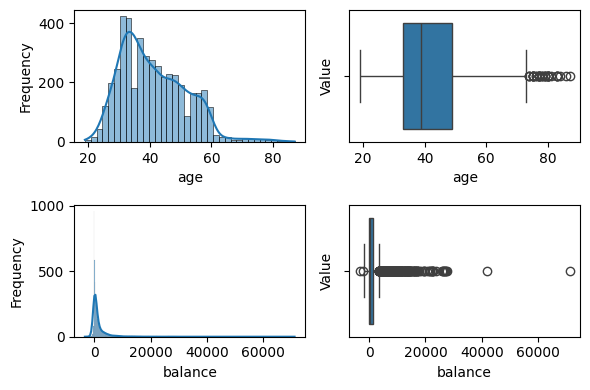

In [9]:
import seaborn as sns

numeric_df = data_df[["age", "balance", "day", "duration", "campaign", "pdays", "previous"]]

# Select the columns of interest
cols = ["age", "balance"]
data = numeric_df[cols]

# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 4))

# Loop through each column and plot a histogram and boxplot
for i, col in enumerate(cols):
    # Histogram
    sns.histplot(data=data, x=col, ax=axs[i, 0], kde=True)
    axs[i, 0].set_xlabel(col)
    axs[i, 0].set_ylabel("Frequency")
    
    # Boxplot
    sns.boxplot(data=data, x=col, ax=axs[i, 1])
    axs[i, 1].set_xlabel(col)
    axs[i, 1].set_ylabel("Value")
    
# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


### Patterns
- **Age:** the distribution is not skewed as said previously and most of the data re clustered around the mean. Very few outliers are present in the boxplot.
- **Balance:** The distribution is highly right skewed as expected from the previous analysis. The boxplot shows that there are a lot of outliers.

**3. Calculate and interpret probabilities that might affect the success of a marketing campaign. Why
these variables are relevant? [0 -15%]**

We can check how some of the variables affect the outcome of the campaign. We can check the probability of success and not sucess for some of the variables.

/var/folders/03/1gwyxnxj3sv1gz46pbk6qpcw0000gn/T/ipykernel_14092/3061651538.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90) # set x-tick labels to vertical orientation
/var/folders/03/1gwyxnxj3sv1gz46pbk6qpcw0000gn/T/ipykernel_14092/3061651538.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90) # set x-tick labels to vertical orientation


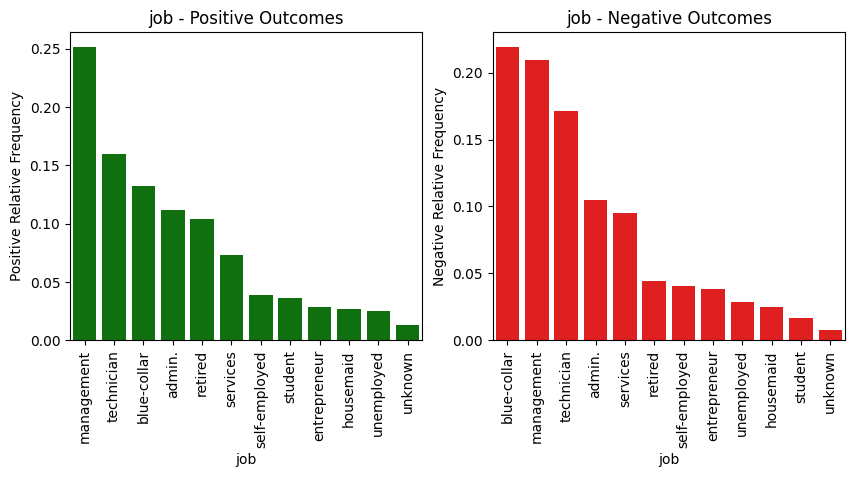

/var/folders/03/1gwyxnxj3sv1gz46pbk6qpcw0000gn/T/ipykernel_14092/3061651538.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90) # set x-tick labels to vertical orientation
/var/folders/03/1gwyxnxj3sv1gz46pbk6qpcw0000gn/T/ipykernel_14092/3061651538.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90) # set x-tick labels to vertical orientation


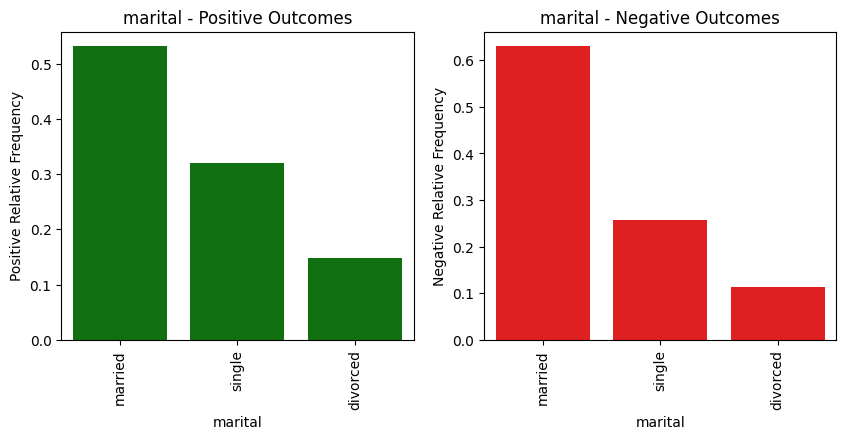

/var/folders/03/1gwyxnxj3sv1gz46pbk6qpcw0000gn/T/ipykernel_14092/3061651538.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90) # set x-tick labels to vertical orientation
/var/folders/03/1gwyxnxj3sv1gz46pbk6qpcw0000gn/T/ipykernel_14092/3061651538.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90) # set x-tick labels to vertical orientation


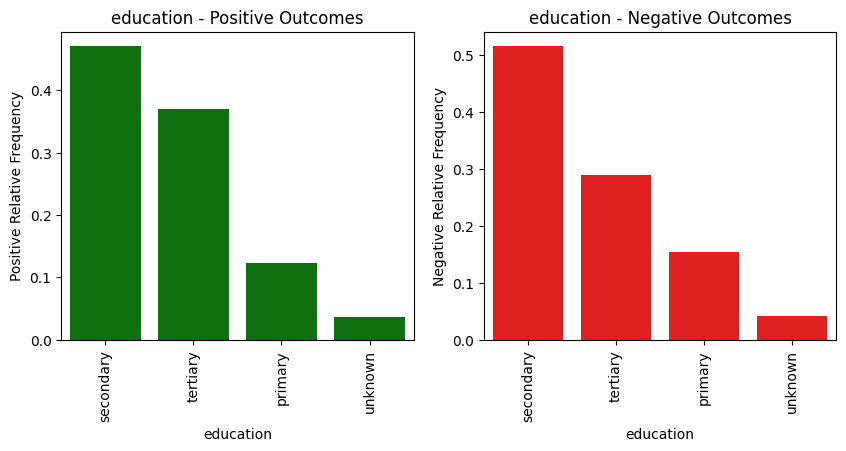

/var/folders/03/1gwyxnxj3sv1gz46pbk6qpcw0000gn/T/ipykernel_14092/3061651538.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90) # set x-tick labels to vertical orientation
/var/folders/03/1gwyxnxj3sv1gz46pbk6qpcw0000gn/T/ipykernel_14092/3061651538.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90) # set x-tick labels to vertical orientation


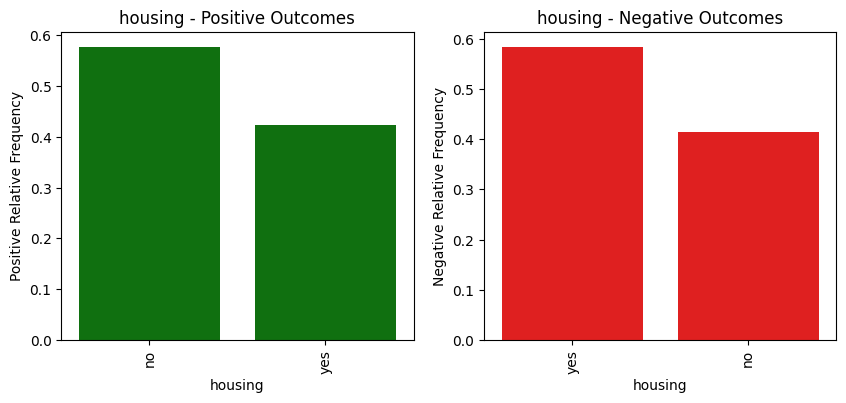

/var/folders/03/1gwyxnxj3sv1gz46pbk6qpcw0000gn/T/ipykernel_14092/3061651538.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90) # set x-tick labels to vertical orientation
/var/folders/03/1gwyxnxj3sv1gz46pbk6qpcw0000gn/T/ipykernel_14092/3061651538.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90) # set x-tick labels to vertical orientation


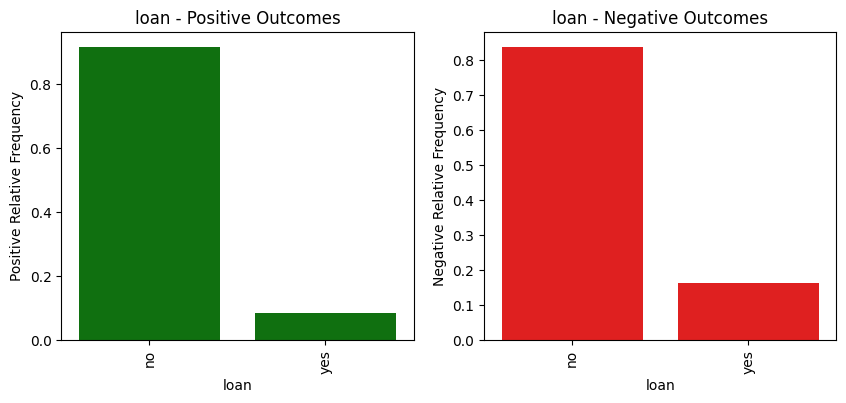

/var/folders/03/1gwyxnxj3sv1gz46pbk6qpcw0000gn/T/ipykernel_14092/3061651538.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90) # set x-tick labels to vertical orientation
/var/folders/03/1gwyxnxj3sv1gz46pbk6qpcw0000gn/T/ipykernel_14092/3061651538.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90) # set x-tick labels to vertical orientation


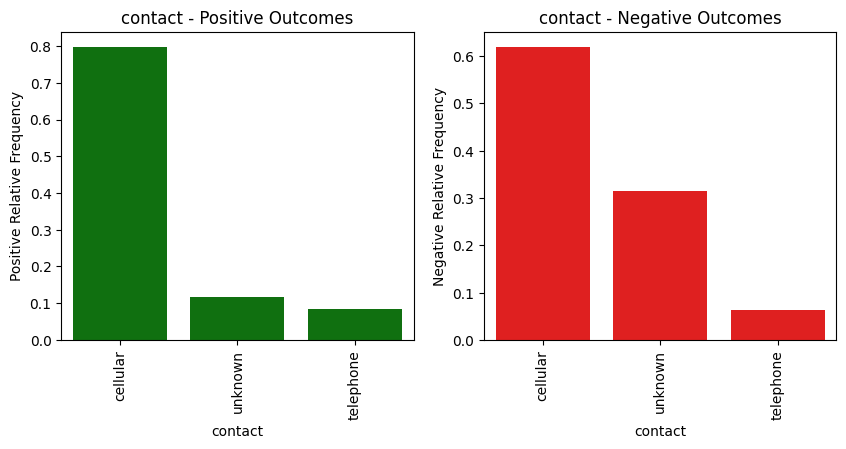

In [49]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

selected_cols = ["job", "marital", "education", "housing", "loan", "contact"]
 
# Create an empty dictionary to store the results 
results_dict = {} 
 
# Iterate through each categorical column 
for column in selected_cols: 
    positive_outcomes = data_df[data_df['y'] == 'yes'] 
    negative_outcomes = data_df[data_df['y'] == 'no'] 
 
    # Calculate frequencies for the current categorical column based on positive outcomes 
    positive_counts = positive_outcomes[column].value_counts() 
    positive_relative_frequencies = positive_counts / len(positive_outcomes) 
 
    # Calculate frequencies for the current categorical column based on negative outcomes 
    negative_counts = negative_outcomes[column].value_counts() 
    negative_relative_frequencies = negative_counts / len(negative_outcomes) 
 
    # Create DataFrames to store the results 
    positive_table = pd.DataFrame({f'{column}': positive_counts.index, 
                                   f'Positive Frequency': positive_counts.values, 
                                   f'Positive Relative Frequency': positive_relative_frequencies.values}) 
 
    negative_table = pd.DataFrame({f'{column}': negative_counts.index, 
                                   f'Negative Frequency': negative_counts.values, 
                                   f'Negative Relative Frequency': negative_relative_frequencies.values}) 
 
    # Store the results in the dictionary 
    results_dict[f'{column}_positive'] = positive_table 
    results_dict[f'{column}_negative'] = negative_table 

# Display the results 
for key, table in results_dict.items(): 
    if 'positive' in key:
        title = key.replace('_positive', '') + ' - Positive Outcomes'
        fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
        sns.barplot(data=table, x=key.replace('_positive', ''), y='Positive Relative Frequency', ax=axs[0], color='green') # set color to green
        axs[0].set_title(title)
        axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90) # set x-tick labels to vertical orientation

        # Get the corresponding negative table
        negative_table = results_dict[key.replace('_positive', '_negative')]
        title = key.replace('_positive', '') + ' - Negative Outcomes'
        sns.barplot(data=negative_table, x=key.replace('_positive', ''), y='Negative Relative Frequency', ax=axs[1], color='red') # set color to red
        axs[1].set_title(title)
        axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90) # set x-tick labels to vertical orientation
        plt.show()
        
        plt.show()


**4. Analyse a subset of the dataset related and calculate a specified probability of success. With this
probability, place a Binomial distribution and explain why this result is important in a banking
marketing campaign. [0 - 20%]**

In [15]:
from scipy.stats import binom

let's take a subset of the data as taken 50% of the row randomly selected

In [16]:
subset_df = data_df.sample(n=len(data_df)//2, random_state=1)

Let's compute the probability of success for the subset of the data. 

In [21]:
no_yes = len(subset_df[subset_df['y'] == 'yes'])
no_no = len(subset_df[subset_df['y'] == 'no'])

In [22]:
no_yes/(no_no+no_yes)

0.11460176991150442

since the outcome is binary, we can use the binomial distribution to calculate the probability of success (i.e. the probability of a customer subscribing to the term deposit) for a given number of trials. So we can derive meaningful statistics for the campaign. Let's check some examples:

In [28]:
# compute the probability of getting exactly 1 conversion in 10 trials
binom.pmf(k = 1, n = 10, p = 0.11)

0.3853920440782337

In [29]:
# compute the probability of getting more or equal to 5 conversions in 10 trials
binom.sf(k = 5, n = 10, p = 0.11)

0.0002506893235025373

**5. Use Normal distribution to explain a main variable. Visualise the data of your variable and
determine whether this could be considered normally distributed or not. [0 – 15%]**

In [30]:
from scipy.stats import norm

Let's try to interpret the variable age using a gaussian distribution.

In [38]:
mean = data_df['age'].mean()
std = data_df['age'].std()

In [40]:
# 60 < age < 70
norm.cdf(70, mean, std) - norm.cdf(60, mean, std)

0.034298987805852055

In [41]:
# lets compare that using the real data provided
data_df[(data_df['age'] > 60) & (data_df['age'] < 70)].shape[0] / data_df.shape[0]

0.014598540145985401

In [43]:
# age < 50
norm.cdf(50, mean, std)

0.798108370171991

In [44]:
# lets compare that using the real data provided
data_df[data_df['age'] < 50].shape[0] / data_df.shape[0]

0.7726166777261668

Lets plot the distribution of the variable age and check if it is normally distributed.

<Axes: xlabel='age', ylabel='Count'>

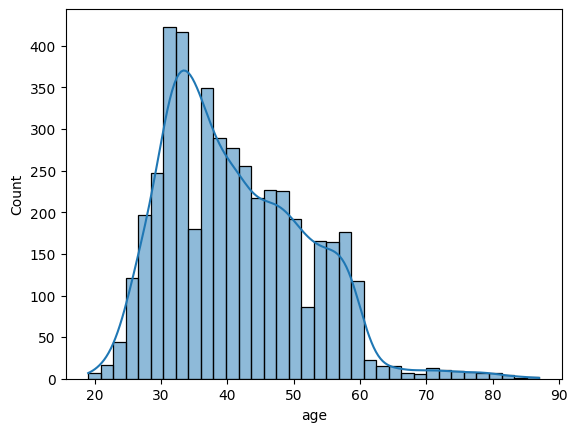

In [37]:
sns.histplot(data=data_df, x='age', kde=True)

Somewhat normally distributed, but not perfectly. Using a normal distribution to model the age variable can still be a good approximation.

References:

https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

Müller, A.C. and Guido, S. (2018) Introduction to machine learning with python: A guide for data scientists. Sebastopol: O’Reilly Media.

McKinney, W. (2022) Python for Data Analysis: Data wrangling with pandas, NumPy, and Jupyter. Beijing: O’Reilly.

CCT College Dublin: Available at: https://moodle.cct.ie